In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import distinctipy
from scipy.interpolate import UnivariateSpline
import glob,os


import numpy as np
%matplotlib inline


import matplotlib.pyplot as plt

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

peri=2458013

In [12]:
datfile=open('..\Simulations\horizons_results.txt','r',errors='replace')
lines=datfile.readlines()
datfile.close()
lines=[f.strip('\n') for f in lines]
nlines=[]
times=[];dist=[]
for dat in lines:
    try:
        int(dat[0])
        nlines.append(dat)
    except: continue
nlines=nlines[3:]
for dat in nlines:
    dat=dat.split()
    times.append(float(dat[0]))
    dist.append(float(dat[3]))
ttimes=np.array([times])[0] #in days, converting to seconds
tdist=1.49e11*np.array([dist])[0]#in au, converting to meters

tmax=np.max(ttimes[np.where(tdist<=4.7e11)])-peri

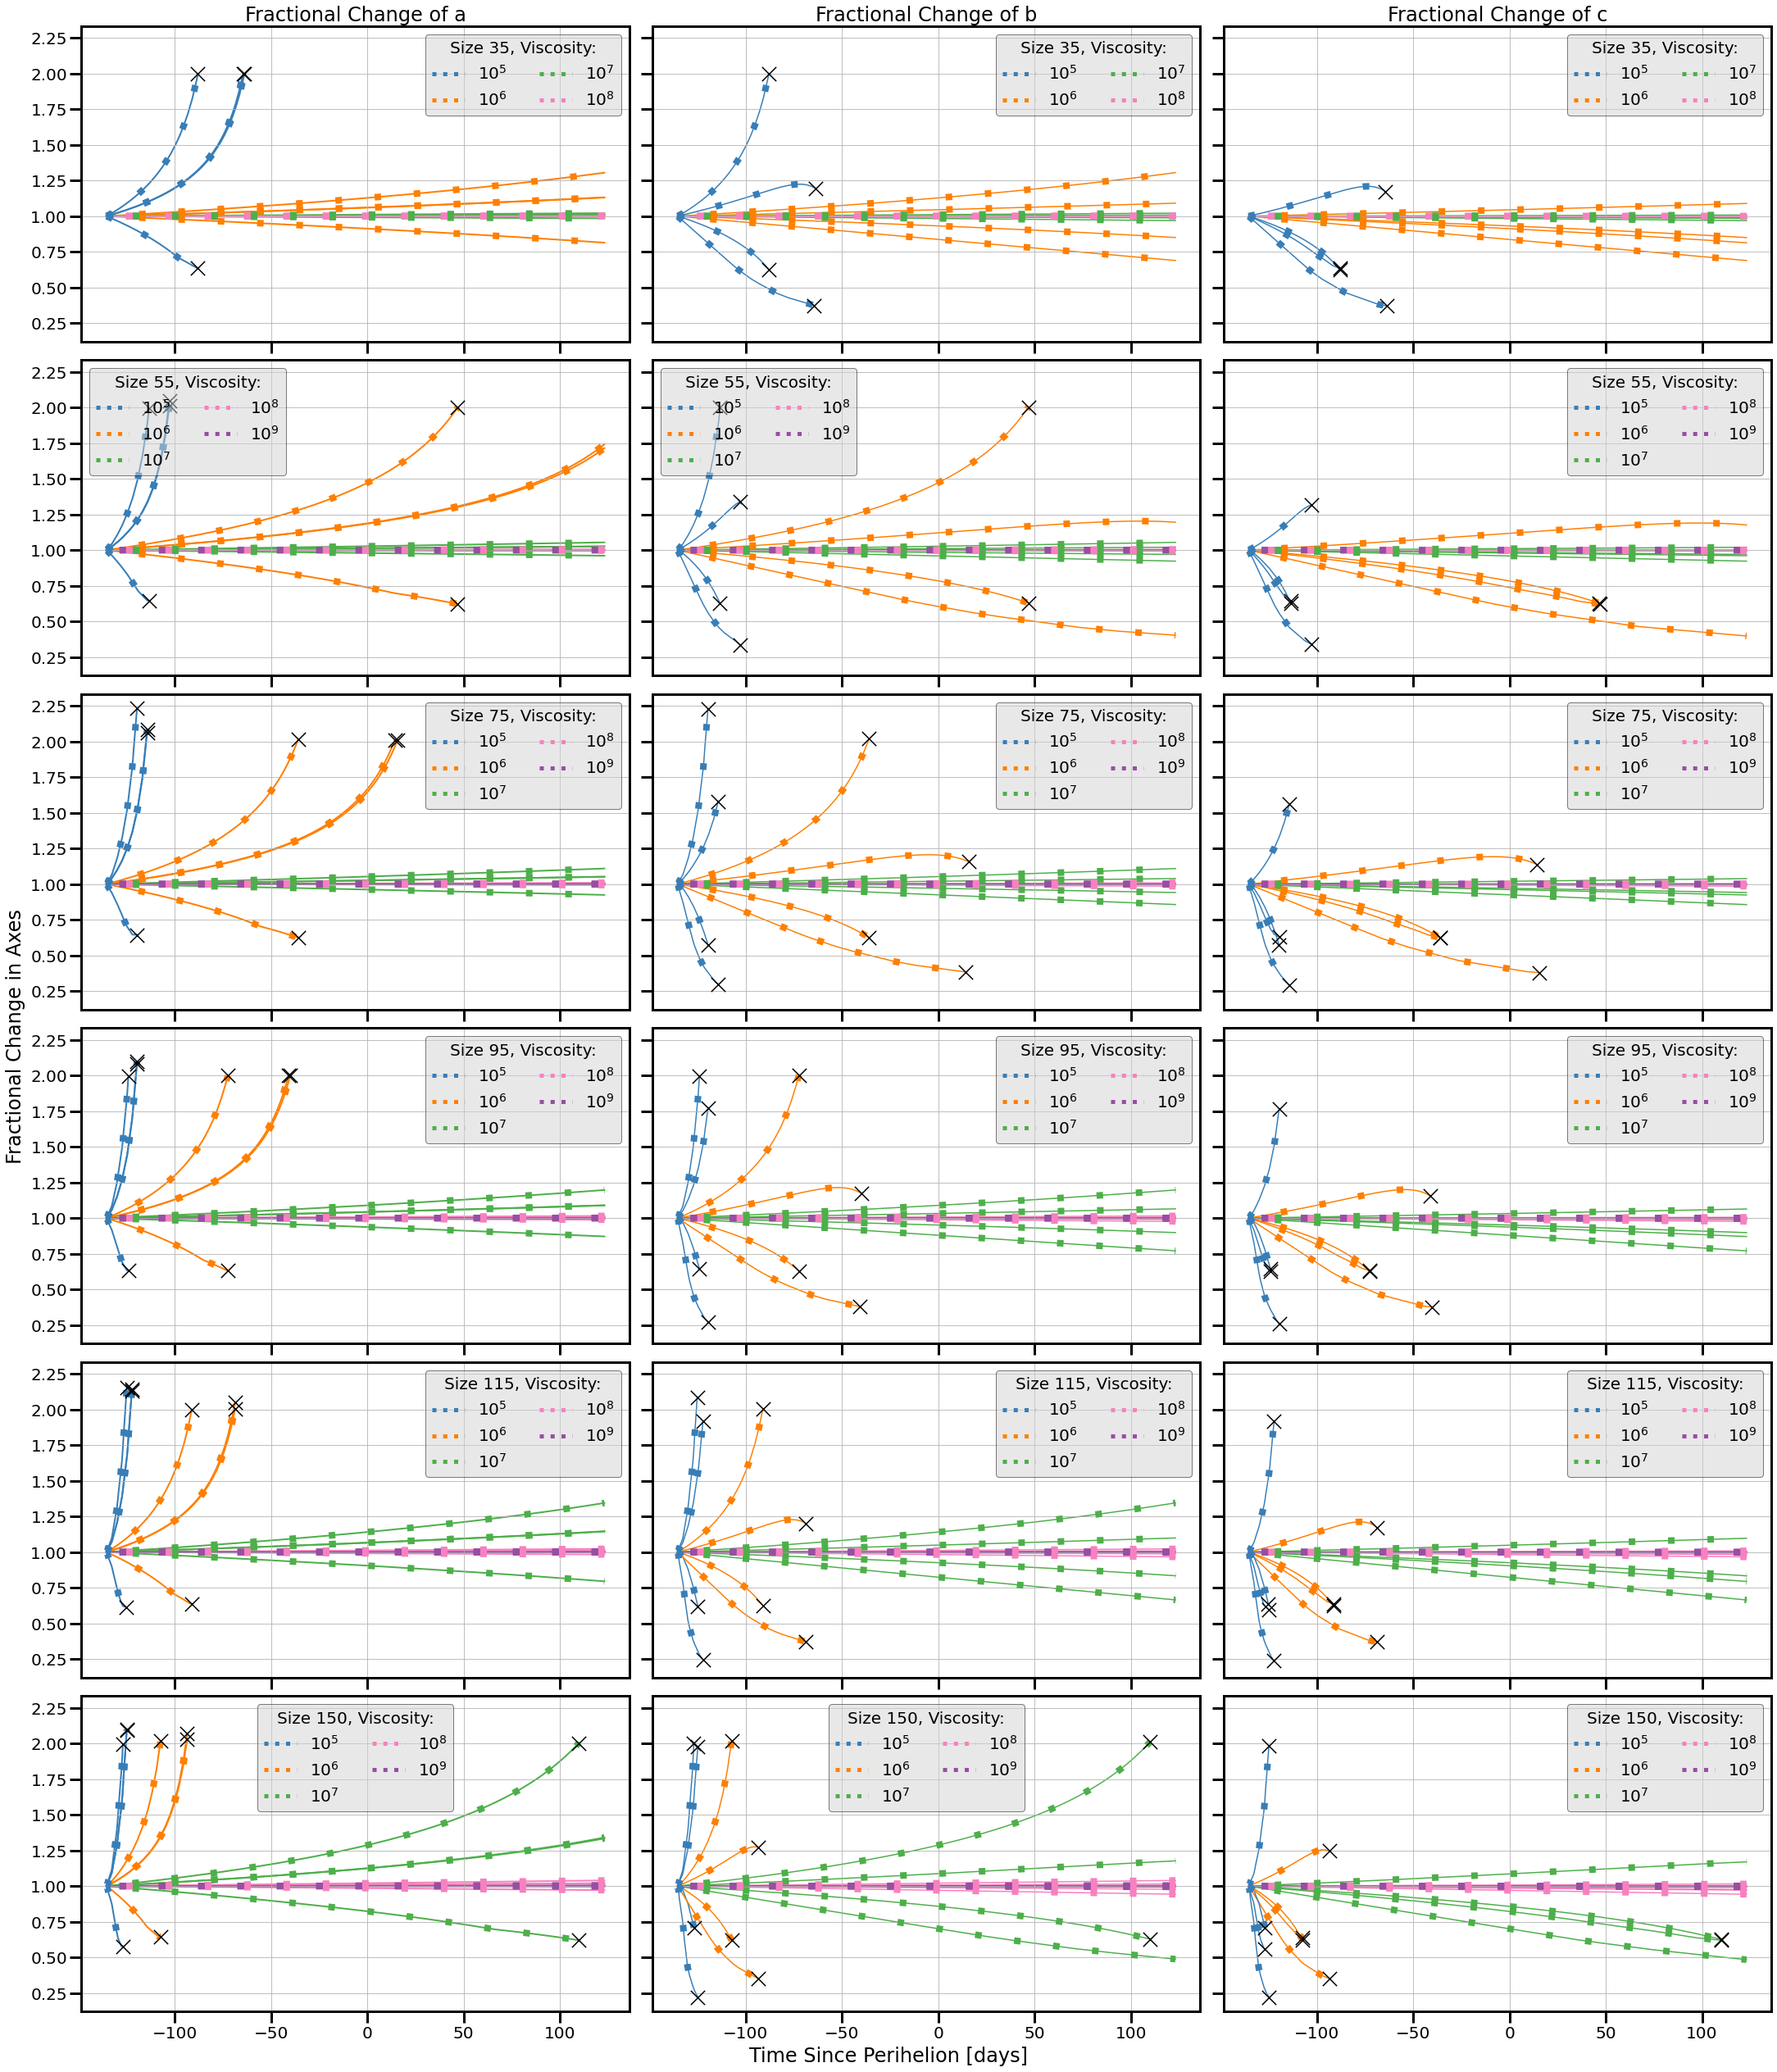

In [17]:
import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline,interp1d
import matplotlib

sizes=[35,55,75,95,115,150]

cmap=matplotlib.cm.get_cmap('gist_rainbow')
cvals=np.linspace(0,1,5)
cols=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#984ea3']

fig,axes=plt.subplots(len(sizes),3,figsize=(30,35),sharex=True,sharey=True,constrained_layout=True)

for i,s in enumerate(sizes):
    
    handles=[]
    mumax=0
    for file in glob.glob("..\Simulations\logs\*a"+str(s)+"*.csv"):        
        mu=int(file.split("_")[-1][:-4])
        mumax=max(mu,mumax)
        pancake=pd.read_csv(file,names=['Times',"MoIs","a","b","c"]).drop(np.nan,axis=0)
        times=pancake['Times'].to_numpy(dtype=float)/86400-peri
        
        converge=(np.max(times)>=tmax)
        
        a=pancake['a'].to_numpy(dtype=float)/1000
        a*=1/a[0]
        axes[i][0].plot(times,a,color=cols[mu-5],label=mu,linewidth=2,zorder=1)
        axes[i][0].plot(times,a,color=cols[mu-5],label=mu,linewidth=8,linestyle=(mu-5,(1,5)),zorder=2)
        
        b=pancake['b'].to_numpy(dtype=float)/1000
        b*=1/b[0]
        axes[i][1].plot(times,b,color=cols[mu-5],zorder=1)
        axes[i][1].plot(times,b,color=cols[mu-5],label=mu,linewidth=8,linestyle=(mu-5,(1,5)),zorder=2)
        
        c=pancake['c'].to_numpy(dtype=float)/1000
        c*=1/c[0]
        axes[i][2].plot(times,c,color=cols[mu-5],zorder=1)
        axes[i][2].plot(times,c,color=cols[mu-5],label=mu,linewidth=8,linestyle=(mu-5,(1,5)),zorder=2)
        
        if not converge:
            axes[i][0].scatter(times[-1],a[-1],color='k',alpha=1,marker='x',s=300,zorder=3)
            axes[i][1].scatter(times[-1],b[-1],color='k',alpha=1,marker='x',s=300,zorder=3)
            axes[i][2].scatter(times[-1],c[-1],color='k',alpha=1,marker='x',s=300,zorder=3)
        
    for mu in range(5,mumax+1):
        handles.append(plt.Line2D([0,1],[0,1],linestyle='dotted',color=cols[mu-5],linewidth=5,label='$10^{%s}$'%mu))
            
    for ax in axes[i]:
        ax.grid()
        #ax.set_facecolor('lightgray')
        ax.legend(handles=handles,ncol=2,title='Size '+str(s)+', Viscosity:',
                  fancybox=True,edgecolor='black',facecolor='lightgray',framealpha=0.5)
        
axes[0][0].set_title("Fractional Change of a")
axes[0][1].set_title("Fractional Change of b")
axes[0][2].set_title("Fractional Change of c")

fig.supxlabel("Time Since Perihelion [days]")
fig.supylabel("Fractional Change in Axes")

plt.savefig('axes_plots.pdf',
           bbox_inches='tight',dpi=300)
plt.show()